Before we start, lets write some code make every output center-aligned. <i>This is just for the aesthetics and is not required.</i>

In [128]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

First, we import some necessary libraries like Pandas, Numpy and Matplotlib.

In [125]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# Step I: Exploratory Data Analysis

Next, we read the titanic dataset. There are 2 .csv files for training and testing respectively. We read them using the read_csv() function of pandas.

In [63]:
path = './data/'
train_df = pd.read_csv(path + 'train.csv')
test_df = pd.read_csv(path + 'test.csv')

We try to view the summary of the training data. Here, we try to see the number of total records, features and first 5 rows of the training dataset.

In [126]:
print('Number of train records: ', train_df.shape[0])
print('Number of train features: ', train_df.shape[1])
train_df.head()

Number of train records:  891
Number of train features:  12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In a similar way, we try to view the summary for the test dataset as well.

In [65]:
print('Number of test records: ', test_df.shape[0])
print('Number of test features: ', test_df.shape[1])
test_df.head()

Number of test records:  418
Number of test features:  11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Lets look at the different features in the dataset. The list of features are:

<li><b>PassengerId</b> (ID of the Passenger)
<li><b>Pclass</b> (Travel Class of the Passenger [1 / 2 / 3])
<li><b>Name</b> (Full Name with title of the Passenger)
<li><b>Sex</b> (Gender of the Passenger)
<li><b>Age</b> (Age of the Passengers)
<li><b>SibSp</b> (Number of siblings/spouses travelling with the Passenger)
<li><b>Parch</b> (Number of parents/children travelling with the Passenger)
<li><b>Fare</b> (Ticket price of the Passenger)
<li><b>Cabin</b> (Cabin number of the Passenger on Titanic)
<li><b>Embarked</b> (Its the place from where they embarked/started the journey [S / C / Q])

The target column for this dataset is Survived which tells us whether a passenger has survived or not. [0 for Dead, 1 for Survived]


Now, let us look at the summary of all the features in the training dataset to get a better idea about them.

In [66]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We know that there are a total of 819 records in the training dataset. But as we can see, the Age column has only 714 valid entries. So, there are a lot of missing data (NaN) for the Age column. We can replace the NaN values of Age with its median value.

In [67]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

Now let us look at the new summary of the features with the enhanced 'Age' column.

In [68]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Which features are important?

Which of the above features do you think is important enough to decide whether a passenger died or survived? Lets think from the perspective of a common man.

1. The ID of passenger <b>SHOULD NOT</b> be a deciding factor.

2. Class of a passenger <b>MIGHT</b> be important. Class in a ship might refer to the social status of the person, which means a wealthy person might be provided a higher class on the ship. Higher class tickets on the ship would have higher fares generally and hence, the people from such higher classes would be given more priority while saving. This feature should be related to the Fare feature as well.

3. Name of a passenger <b>SHOULD NOT</b> be a deciding factor.

4. Sex/Gender of a passenger <b>SHOULD</b> be very important. Generally, we all know that women and children are given highest importance while saving people from a dire situation.

5. Age <b>SHOULD</b> be important. As discussed above, children are saved first.

6. Number of Siblings/Spouses. <i>Not really sure about this</i>.

7. Number of Parents/Children. <i>Not really sure about this</i>.

8. Fare <b>MIGHT</b> be important just like the Class of the passenger.

9. Cabin number <b>SHOULD NOT</b> be important just like the Passenger ID.

10. Where the person has embarked from <b>SHOULD NOT</b> be important as well.

So, based on the analysis above, the important features should be:<b>
<li>Pclass
<li>Sex
<li>Age
<li>Fare</b>

Lets visualize how the survival of the passengers is related to some of these features.

## How important is Gender?

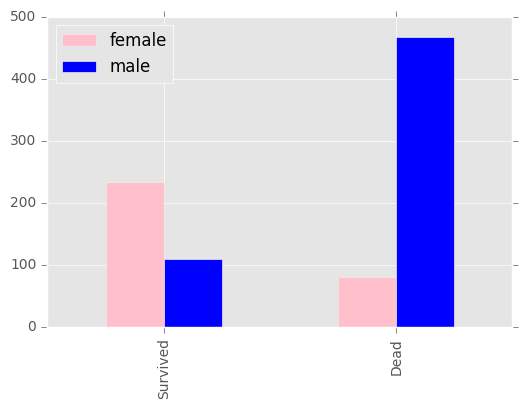

In [158]:
gender_survived = train_df[train_df['Survived']==1]['Sex'].value_counts()
gender_dead = train_df[train_df['Survived']==0]['Sex'].value_counts()

gender_plot = pd.DataFrame([gender_survived, gender_dead])
gender_plot.index = ['Survived', 'Dead']
gender_plot.plot(kind='Bar', color=['pink', 'blue']) # just using these colors. Don't interpret it otherwise!

From this graph plot, it is clearly visible that women have survived more than men and men have died so much more than women. So, the feature of Gender is <b>REALLY IMPORTANT!</b>

## How important is <i>Age</i>?

Now as we said earlier, women and children are generally given higher preference during a rescue mission. We have already proved that women survived more than men. Now, lets check if our theory stands true for children as well. We will now check the Age feature's importance to determine the Survival chances of a passenger. As Age has a wide domain range, its wiser to choose a Histogram plot for this.

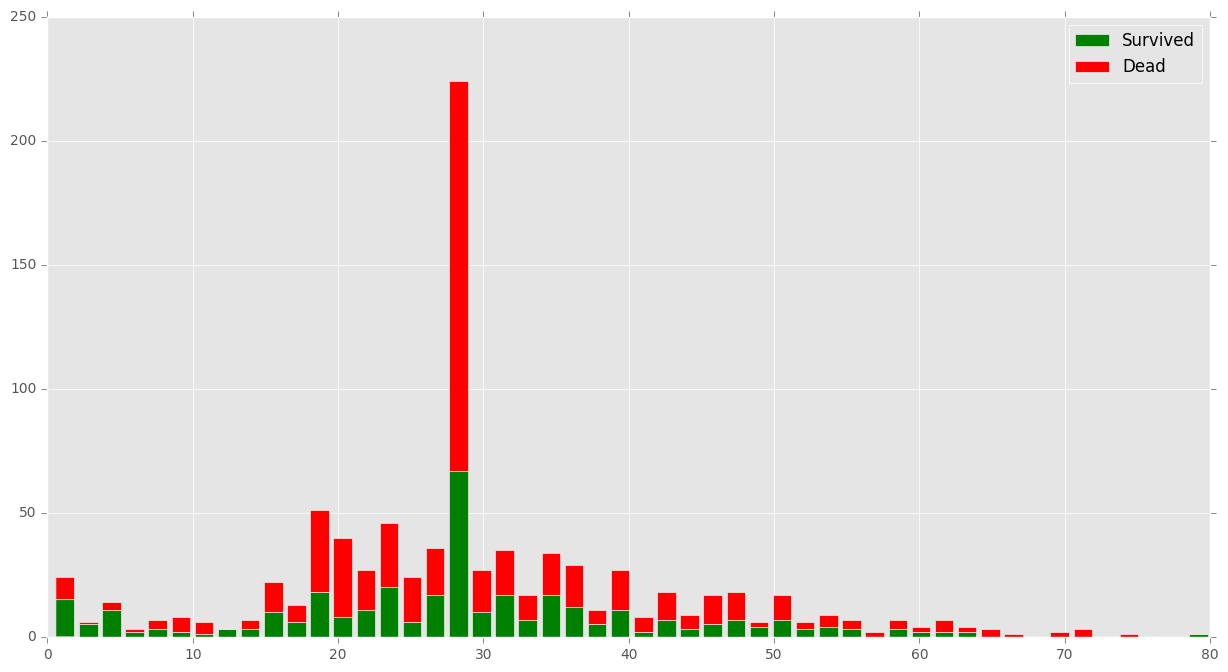

In [130]:
age_survived = train_df[train_df['Survived']==1]['Age']
age_dead = train_df[train_df['Survived']==0]['Age']

plt.figure(figsize=(15, 8))
plt.hist([age_survived, age_dead], stacked=True, label=['Survived', 'Dead'], color=['g', 'r'], bins=50)
plt.xlabel = 'Age'
plt.ylabel = 'Number of passengers'
plt.legend()

If you look at the visualization above, you can see that children (generally age of less than 10 years old) have survived more. Some of the old people have also managed to survive. However, the number of deaths has been more prominent in the middle-aged groups.

So, this proves our theory that <b>Women</b> and <b>Children</b> were probably given the most importance during the rescue mission.

## Lets look at the <i>Fare</i> feature

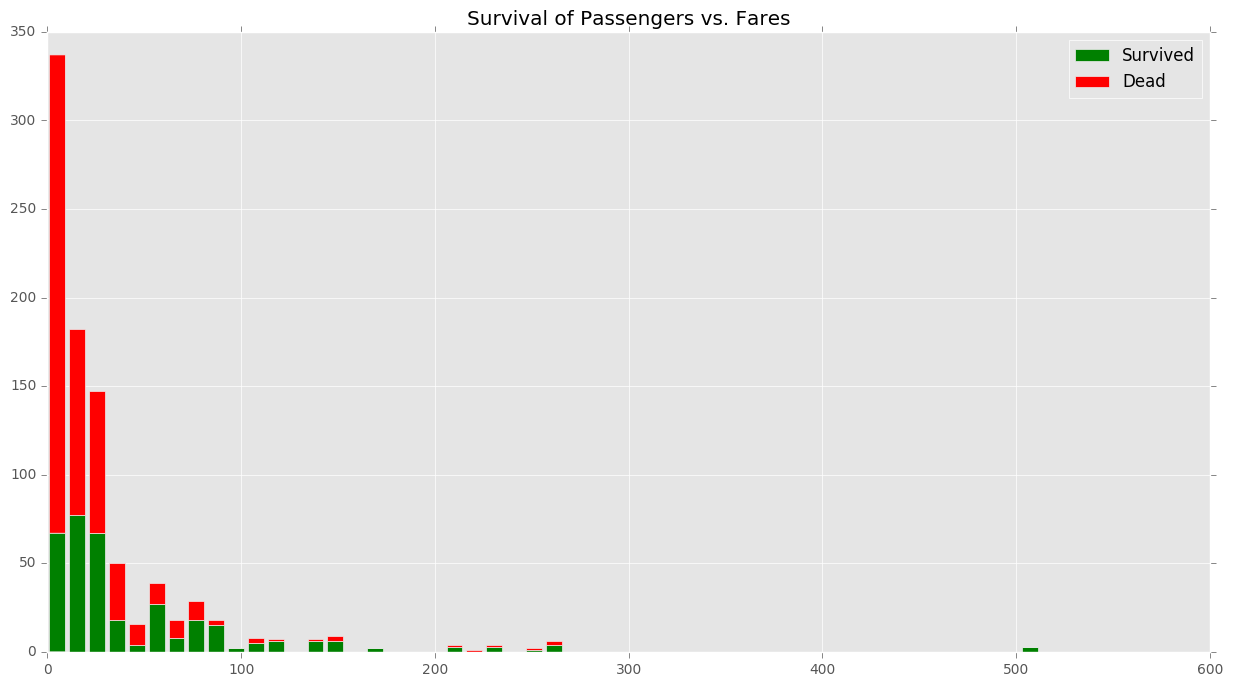

In [157]:
fare_survived = train_df[train_df['Survived']==1]['Fare']
fare_dead = train_df[train_df['Survived']==0]['Fare']

plt.figure(figsize=(15, 8))
plt.hist([fare_survived, fare_dead], stacked=True, label=['Survived', 'Dead'], color=['g', 'r'], bins=50)
plt.title('Survival of Passengers vs. Fares')
plt.legend()
plt.show()

In [ ]:
We can clearly see that the lesser the fares, the more were the chances of those passengers not surviving till the end.